# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Bagus Ario Yudanto
- **Email:** bagusarioyudanto123@gmail.com
- **ID Dicoding:** bagus_ario_yudanto

## Menentukan Pertanyaan Bisnis

- 1. Jenis pembayaran apa yang paling banyak digunakan oleh pelanggan?
- 2. Seller mana yang memiliki pendapatan tertinggi dan terendah?
- 3. Berapa rata-rata waktu pengiriman pesanan per bulan selama setahun?
- 4. Berapa persen pesanan yang mengalami keterlambatan pengiriman?

## Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'numpy'

## Data Wrangling

### Gathering Data

In [ ]:
orders_df = pd.read_csv("data/olist_orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
order_items_df = pd.read_csv("data/olist_order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
order_payments_df = pd.read_csv("data/olist_order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
sellers_df = pd.read_csv("data/olist_sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Orders dataset berisi informasi tentang order id, customer id, order status, order purchase timestamp, order purchase approved, order delivered carrier date, order delivered customer date, dan order estimated delivery date
- order items dataset berisi informasi tentang order id, order item id, product id, seller id, shipping limit date, price, dan freight value
- order payments dataset berisi informasi tentang order id, payment sequential, payment type, payment installments, dan payment value
- sellers dataset berisi informasi tentang seller id, seller zip code prefix, seller city, dan seller state

### Assessing Data

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [ ]:
print('Number of duplicate data: {}'.format(orders_df.duplicated().sum()))

Number of duplicate data: 0


In [ ]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [ ]:
print('Number of duplicate data: {}'.format(order_items_df.duplicated().sum()))

Number of duplicate data: 0


In [ ]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [ ]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
order_payments_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [ ]:
print('Number of duplicate data: {}'.format(order_payments_df.duplicated().sum()))

Number of duplicate data: 0


In [ ]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [ ]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
sellers_df.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [ ]:
print('Number of duplicate data: {}'.format(sellers_df.duplicated().sum()))

Number of duplicate data: 0


In [ ]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
- Pada orders_df terdapat beberapa masalah yaitu
  - order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date seharusnya bertipe datetime
  - Terdapat missing value pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date
- Pada order_items_df terdapat beberapa masalah yaitu
  - shipping_limit_date seharusnya datetime
  

### Cleaning Data

In [ ]:
datetime_columns = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [ ]:
orders_df.drop(orders_df[orders_df['order_status'] != 'delivered'].index, inplace=True)
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96478 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96478 non-null  object        
 1   customer_id                    96478 non-null  object        
 2   order_status                   96478 non-null  object        
 3   order_purchase_timestamp       96478 non-null  datetime64[ns]
 4   order_approved_at              96464 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96476 non-null  datetime64[ns]
 6   order_delivered_customer_date  96470 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96478 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [ ]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,14
order_delivered_carrier_date,2
order_delivered_customer_date,8
order_estimated_delivery_date,0


In [ ]:
orders_df.drop(orders_df[orders_df.order_delivered_customer_date.isna()].index, inplace=True)
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,14
order_delivered_carrier_date,1
order_delivered_customer_date,0
order_estimated_delivery_date,0


In [ ]:
index = orders_df[orders_df.order_delivered_carrier_date.isna()].index
orders_df.loc[index, 'order_delivered_carrier_date'] = orders_df.loc[index, 'order_approved_at']
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,14
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


In [ ]:
index = orders_df[orders_df.order_approved_at.isna()].index
orders_df.loc[index, 'order_approved_at'] = orders_df.loc[index, 'order_purchase_timestamp']
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96470 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96470 non-null  object        
 1   customer_id                    96470 non-null  object        
 2   order_status                   96470 non-null  object        
 3   order_purchase_timestamp       96470 non-null  datetime64[ns]
 4   order_approved_at              96470 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96470 non-null  datetime64[ns]
 6   order_delivered_customer_date  96470 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96470 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 8.6+ MB


In [ ]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Insight:**
- Pada orders_df dilakukan perbaikan tipe data yang belum sesuai, penghapusan baris data yang status pesanannya belum sampai ke pelanggan, dan mengisi nilai yang kosong.
- Pada order_items_df dilakukan perbaikan tipe data yang belum sesuai

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
packaging_time = orders_df['order_delivered_carrier_date'] - orders_df['order_approved_at']
packaging_time = packaging_time.apply(lambda x: x.total_seconds())
seconds_in_a_day = 24 * 60 * 60
orders_df['packaging_time'] = round(packaging_time/seconds_in_a_day)
orders_df['packaging_time'].describe()

,packaging_time
count,96470.000000
mean,2.799865
std,3.551055
min,-171.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,126.000000


In [ ]:
orders_df[orders_df['packaging_time'] < 0]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,packaging_time
15,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04,-1.0
64,688052146432ef8253587b930b01a06d,81e08b08e5ed4472008030d70327c71f,delivered,2018-04-22 08:48:13,2018-04-24 18:25:22,2018-04-23 19:19:14,2018-04-24 19:31:58,2018-05-15,-1.0
199,58d4c4747ee059eeeb865b349b41f53a,1755fad7863475346bc6c3773fe055d3,delivered,2018-07-21 12:49:32,2018-07-26 23:31:53,2018-07-24 12:57:00,2018-07-25 23:58:19,2018-07-31,-2.0
415,56a4ac10a4a8f2ba7693523bb439eede,78438ba6ace7d2cb023dbbc81b083562,delivered,2018-07-22 13:04:47,2018-07-27 23:31:09,2018-07-24 14:03:00,2018-07-28 00:05:39,2018-08-06,-3.0
483,4df92d82d79c3b52c7138679fa9b07fc,ba0660bf3fffe505ee892e153a2fbd49,delivered,2018-07-24 11:32:11,2018-07-29 23:30:52,2018-07-26 14:46:00,2018-07-27 18:55:57,2018-08-06,-3.0
...,...,...,...,...,...,...,...,...,...
98884,67884ec2877808808c25211dce58689b,08ab9916d3e6d664efe2862d1a764d88,delivered,2017-05-07 12:31:08,2017-05-12 21:33:56,2017-05-10 11:43:58,2017-05-16 07:57:33,2017-05-29,-2.0
99023,fba0d18dccd0e4e88943d84a0f5aa448,412737810005be70b7bdfb4e4dc69dd2,delivered,2018-04-22 20:23:31,2018-04-24 18:33:58,2018-04-23 23:12:12,2018-04-24 23:22:08,2018-05-10,-1.0
99230,78008d03bd8ef7fcf1568728b316553c,043e3254e68daf7256bda1c9c03c2286,delivered,2018-07-03 13:11:13,2018-07-05 16:32:52,2018-07-03 12:57:00,2018-07-10 17:47:39,2018-07-23,-2.0
99266,76a948cd55bf22799753720d4545dd2d,3f20a07b28aa252d0502fe7f7eb030a9,delivered,2018-01-30 02:41:30,2018-02-04 23:31:46,2018-01-31 18:11:58,2018-03-18 20:08:50,2018-03-02,-4.0


In [ ]:
index = orders_df[orders_df['packaging_time'] < 0].index
orders_df.loc[index, 'order_delivered_carrier_date'] = orders_df.loc[index, 'order_approved_at']

In [ ]:
packaging_time = orders_df['order_delivered_carrier_date'] - orders_df['order_approved_at']
packaging_time = packaging_time.apply(lambda x: x.total_seconds())
seconds_in_a_day = 24 * 60 * 60
orders_df['packaging_time'] = round(packaging_time/seconds_in_a_day)
orders_df['packaging_time'].describe()

,packaging_time
count,96470.000000
mean,2.813517
std,3.492350
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,126.000000


In [ ]:
delivery_time = orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
seconds_in_a_day = 24 * 60 * 60
orders_df['delivery_time'] = round(delivery_time/seconds_in_a_day)
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,packaging_time,delivery_time
5295,8a723730400b508cbf47fbef4a76ec8e,f19376e0c54da9409485f7ef9556d367,delivered,2018-02-18 12:41:01,2018-02-18 13:46:36,2018-02-19 20:26:45,2018-03-03 02:48:53,2018-03-14,1.0,13.0
75160,acb8a8355ba526f10697c17f40dc3352,232fc199e2c1159c64a569a38816e593,delivered,2018-05-22 09:53:18,2018-05-22 17:14:33,2018-05-23 14:12:00,2018-05-24 15:40:44,2018-05-30,1.0,2.0
60809,d88a225d12c6ae71beab5cfa2e6e0b24,2a11d48d4cb690ef0aadeff37d522201,delivered,2018-07-28 23:06:54,2018-07-28 23:24:13,2018-07-30 11:28:00,2018-07-31 16:21:50,2018-08-03,2.0,3.0
8927,1b147191d6c1f8ce8f2cf5d52f3e9c49,84f4d00f0e0abcb7c517b950857b4728,delivered,2017-06-20 10:53:15,2017-06-21 06:35:12,2017-06-27 16:32:41,2017-07-27 16:08:40,2017-07-18,6.0,37.0
97191,ef1fc34d1d1ab34f4eb53f2c9b4ed2ab,034454b0d87f1dc91dace5306bde36af,delivered,2018-02-05 17:16:35,2018-02-05 17:33:05,2018-02-07 20:28:33,2018-02-19 09:16:30,2018-03-06,2.0,14.0


In [ ]:
print('Average delivery time is {} days'.format(round(orders_df['delivery_time'].mean())))

Average delivery time is 13 days


In [ ]:
orders_df['delivery_time'].describe()

,delivery_time
count,96470.000000
mean,12.517052
std,9.550133
min,1.000000
25%,7.000000
50%,10.000000
75%,16.000000
max,210.000000


In [ ]:
delivery_delay = orders_df['order_delivered_customer_date'] - orders_df['order_estimated_delivery_date']
delivery_delay = delivery_delay.apply(lambda x: x.total_seconds())
seconds_in_a_day = 24 * 60 * 60
orders_df['delivery_delay'] = round(delivery_delay/seconds_in_a_day)
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,packaging_time,delivery_time,delivery_delay
62858,718780b93362dd897e0d9f9982c87736,1afe6bdaaf6f029eea4002b18132d12f,delivered,2017-07-14 18:53:09,2017-07-14 19:05:19,2017-07-20 17:33:11,2017-08-10 17:32:46,2017-08-17,6.0,27.0,-6.0
59831,b4423cdd0316fb3064befb92d164de96,05a9e7f2eb9b68b7b7a74696782af52b,delivered,2017-09-13 17:23:32,2017-09-14 14:30:22,2017-09-15 21:17:45,2017-09-21 20:15:06,2017-09-29,1.0,8.0,-7.0
78415,11177b43d0995dfa2114ceefa2c0cc16,a64c6e8ef34e7fff66a93133937bcde2,delivered,2017-11-17 08:56:41,2017-11-22 02:56:30,2017-11-22 18:22:57,2017-12-21 20:08:33,2017-12-12,1.0,34.0,10.0
67872,27a22bb13b2fc366ab20226479a22f5a,f5d8a545323f03c74139eb656ad7c355,delivered,2017-09-18 20:07:26,2017-09-18 20:15:18,2017-09-20 13:42:56,2017-10-05 22:04:06,2017-10-13,2.0,17.0,-7.0
74263,b6d51ca2b26deb9b9bc37e6b3ea34244,96f63dc8d7bbb192d25213b41a5b2b08,delivered,2017-02-13 23:24:18,2017-02-13 23:35:20,2017-02-17 10:30:39,2017-03-01 10:13:52,2017-03-24,3.0,15.0,-23.0


In [ ]:
orders_df['delivery_delay'].describe()

,delivery_delay
count,96470.000000
mean,-11.007660
std,10.188854
min,-146.000000
25%,-16.000000
50%,-12.000000
75%,-6.000000
max,189.000000


In [ ]:
percentage_of_punctuality = round((orders_df['delivery_delay'] <= 0).mean() * 100)
print('Percentage of punctuality: {}%'.format(percentage_of_punctuality))

Percentage of punctuality: 92%


In [ ]:
order_items_df.groupby(by='seller_id').agg({
    'order_id': 'nunique',
    'product_id': 'nunique',
    'price': 'sum',
    'freight_value': 'sum'
}).sort_values(by='product_id', ascending=False)

,order_id,product_id,price,freight_value
seller_id,,,,
4a3ca9315b744ce9f8e9374361493884,1806,399,200472.92,35067.04
cca3071e3e9bb7d12640c9fbe2301306,712,322,64009.89,14371.40
d91fb3b7d041e83b64a00a3edfb37e4f,535,315,40889.74,9290.77
fa1c13f2614d7b5c4749cbc52fecda94,585,289,194042.03,10042.70
7142540dd4c91e2237acb7e911c4eba2,319,266,37373.56,6915.60
...,...,...,...,...
8b181ee5518df84f18f4e1a43fe07923,1,1,27.90,27.08
8b11118053756a9a2932f447e11fc1b5,1,1,79.99,11.17
8a1ff5c35f6595a73fef4c7b96e4908a,2,1,1598.00,284.80


In [ ]:
order_payments_df.groupby(by='payment_type').agg({
    'order_id': 'nunique',
    'payment_value': 'sum'
}).sort_values(by='payment_value', ascending=False)

,order_id,payment_value
payment_type,,
credit_card,76505,12542084.19
boleto,19784,2869361.27
voucher,3866,379436.87
debit_card,1528,217989.79
not_defined,3,0.00


In [ ]:
order_payments_df[order_payments_df['payment_value'] < 1]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
202,5262eaeb971616ffef822379ed91896f,1,credit_card,1,0.67
521,c1219b88f5d48e3d0dd3229cbd88a722,1,credit_card,1,0.52
810,7db5f2eb8f5f54db9f9e71ba4296bcbf,2,voucher,1,0.01
2393,8e5148bee82a7e42c5f9ba76161dc51a,1,credit_card,1,0.67
2522,fb4de3600d359f84927517e78ff9ba54,1,voucher,1,0.01
...,...,...,...,...,...
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.00
102308,7e8072dc0f35ebb0c1b2a4743e0f179a,1,credit_card,1,0.22
102686,9f372562f0d05458a142227656ddfc85,3,voucher,1,0.65
103383,a7b1bca7ec838a8ddb2a1a1403c5d1d2,1,credit_card,1,0.49


In [ ]:
sellers_df.groupby(by='seller_city').seller_id.nunique().sort_values(ascending=False)

,seller_id
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52
...,...
ivoti,1
itirapina,1
itau de minas,1


In [ ]:
sellers_df.groupby(by='seller_state').seller_id.nunique().sort_values(ascending=False)

,seller_id
seller_state,
SP,1849
PR,349
MG,244
SC,190
RJ,171
RS,129
GO,40
DF,30
ES,23


In [ ]:
order_items_orders_df = pd.merge(
    left=order_items_df,
    right=orders_df,
    how='inner',
    left_on='order_id',
    right_on='order_id'
)
order_items_orders_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,packaging_time,delivery_time,delivery_delay
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,6.0,8.0,-8.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,8.0,16.0,-2.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,2.0,8.0,-13.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,2.0,6.0,-5.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,12.0,25.0,-15.0


In [ ]:
order_items_orders_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0
customer_id,0
order_status,0
order_purchase_timestamp,0


In [ ]:
order_items_orders_df.groupby(by='customer_id').agg({
    'product_id': 'nunique',
    'price': 'sum'
}).sort_values(by='product_id', ascending=False)

,product_id,price
customer_id,,
0d861a5e4dd6a9079d89e1330848f0ab,8,1138.30
1205480caca6c37f55954da838933b8a,7,186.59
a67a246af6ba598a14cc86df3c0354ee,7,563.00
30bb84b541c96af98ba7d90b9ebf35d0,7,1093.00
50920f8cd0681fd86ebe93670c8fe52e,6,306.77
...,...,...
56f529dd0697875be243ebde725dfb89,1,179.99
56f515316cc5a6a5dea32f233e73fad8,1,99.90
56f48a4b6b679bf9b82d46ff1be7875a,1,46.86


In [ ]:
order_items_orders_df.groupby(by='customer_id').agg({
    'price': 'sum'
}).sort_values(by='price', ascending=False)

,price
customer_id,
1617b1357756262bfa56ab541c47bc16,13440.00
ec5b2ba62e574342386871631fafd3fc,7160.00
c6e2731c5b391845f6800c97401a43a9,6735.00
f48d464a0baaea338cb25f816991ab1f,6729.00
3fd6777bbce08a352fddd04e4a7cc8f6,6499.00
...,...
d2c63ad286e3ca9dd69218008d61ff81,2.90
184e8e8e48937145eb96c721ef1f0747,2.29
a790343ca6f3fee08112d678b43aa7c5,2.20


In [ ]:
order_items_orders_df.groupby(by='customer_id').agg({
    'product_id': 'nunique',
    'freight_value': 'sum'
}).sort_values(by='freight_value', ascending=False)

,product_id,freight_value
customer_id,,
ed583a2a1eaf0dedc33af816153e8b8c,1,1794.96
5e312b0d9bf5c91599eb42120e633b19,6,1002.29
088d20d5878711d537176871a6e850e4,1,711.33
8c20d9bfbc96c5d39025d77a3ba83d7f,2,626.64
023cf83ac35d703a6f3c1b31bcf844d5,1,502.98
...,...,...
30bf893018e91309b87a1beba9915f56,1,0.00
5850a1aca7d07248dad1103ad272341d,1,0.00
5ecc5bb2b96483a913b2d138e56aa1df,1,0.00


In [ ]:
order_items_orders_df.groupby(by='order_id').agg({
    'product_id': 'nunique',
    'price': 'sum',
    'freight_value': 'sum',
    'packaging_time': 'mean',
    'delivery_time': 'mean',
    'delivery_delay': 'mean'
}).sort_values(by='product_id', ascending=False)

,product_id,price,freight_value,packaging_time,delivery_time,delivery_delay
order_id,,,,,,
ca3625898fbd48669d50701aba51cd5f,8,1138.30,18.98,1.0,9.0,-22.0
7d8f5bfd5aff648220374a2df62e84d5,7,563.00,19.94,5.0,20.0,-18.0
77df84f9195be22a4e9cb72ca9e8b4c2,7,186.59,22.98,0.0,1.0,-31.0
ad850e69fce9a512ada84086651a2e7d,7,1093.00,149.57,1.0,16.0,-5.0
3990f96693d321ac142fff312bf3706a,6,80.97,19.98,1.0,3.0,-35.0
...,...,...,...,...,...,...
56d41d6576e901ff789906da40878acb,1,21.90,9.34,4.0,17.0,1.0
56d1fb4a6598e5323822ae47a4d14c9d,1,16.99,15.10,2.0,19.0,-4.0
56d1f75d4f625ce5ac6ab30d22cc35fa,1,21.99,15.10,1.0,18.0,-5.0


In [ ]:
order_items_orders_df.groupby(by='product_id').packaging_time.mean().sort_values()

,packaging_time
product_id,
8c7274c4e638e7f229007fe28aafc741,0.0
ced26c2a308260f9e9e34004ed509901,0.0
65b96b06398ff62ae0202c4c1987984b,0.0
65bebe0ebbe0c371c9ad29d76801482c,0.0
2584470c4e2f1fe771b2313ccfb36cdf,0.0
...,...
8b2a1e0d2ee4fa00cd00519b7881203a,55.0
25d2c18566cb8238ee65ecb9ac0f701b,61.0
a9fa5ce6ccf634df53e924a8ca7099ab,101.0


In [ ]:
order_items_orders_df.groupby(by='product_id').delivery_time.mean().sort_values()

,delivery_time
product_id,
a7662c5405b825fa922c200b82df17bf,1.0
e5de2225ad9ea5307da42efd7fe437f6,1.0
0fd7c411bd5b0e103be4a2e18642c79b,1.0
22544bc3cbb21d6fca8630805448ed93,1.0
2f46e035eccda1e1e2127096bb7483e7,1.0
...,...
4f687412e6805c3cfc9e0c5ec2f841e0,175.0
5215eef690e61a0c178ed552e6e2d06a,187.0
f82a4b08cf7b2bf375fb77e519231f9a,187.0


In [ ]:
order_items_orders_df.groupby(by='product_id').delivery_delay.mean().sort_values()

,delivery_delay
product_id,
ee2f96cb63d491d963a67285f048775a,-139.0
29dcc20b00ccb0dd2136eb2f4c5f3847,-134.0
38841dec90eddf2f43cdfabc48b3831a,-108.0
87b92e06b320e803d334ac23966c80b1,-84.0
c144fdb6fc3bda28fb58900cdb37247c,-83.0
...,...
bdeb69e094c42de582310fffad126d77,154.0
4f687412e6805c3cfc9e0c5ec2f841e0,162.0
a224196b0b605fdffac1d9224f052ceb,162.0


In [ ]:
order_items_orders_sellers_df = pd.merge(
    left=order_items_orders_df,
    right=sellers_df,
    how='left',
    left_on='seller_id',
    right_on='seller_id'
)
order_items_orders_sellers_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,packaging_time,delivery_time,delivery_delay,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,6.0,8.0,-8.0,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,8.0,16.0,-2.0,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,2.0,8.0,-13.0,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,2.0,6.0,-5.0,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,12.0,25.0,-15.0,87900,loanda,PR


In [ ]:
order_items_orders_sellers_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0
customer_id,0
order_status,0
order_purchase_timestamp,0


In [ ]:
order_items_orders_sellers_df.groupby(by='seller_id').agg({
    'customer_id': 'nunique',
    'product_id': 'nunique',
    'price': 'sum',
    'freight_value': 'sum'
}).sort_values(by='customer_id', ascending=False)

,customer_id,product_id,price,freight_value
seller_id,,,,
6560211a19b47992c3666cc44a7e94c0,1819,254,120702.83,27348.11
4a3ca9315b744ce9f8e9374361493884,1772,394,196882.12,34338.31
cc419e0650a3c5ba77189a1882b7556a,1651,37,101090.96,24846.03
1f50f920176fa81dab994f9023523100,1399,23,106655.71,35057.23
da8622b14eb17ae2831f4ac5b9dab84a,1311,221,159816.87,24889.91
...,...,...,...,...
a72f15980dc3e9bfd1a49ac9b2f3af65,1,1,89.90,18.73
d93b8458c6fe139d85cfa5eadbf55bd2,1,1,19.90,14.10
265fdc289dffa9f1ad801c74f7d0de47,1,1,495.00,51.55


In [ ]:
all_df = pd.merge(
    left=order_items_orders_sellers_df,
    right=order_payments_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,packaging_time,delivery_time,delivery_delay,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,6.0,8.0,-8.0,27277,volta redonda,SP,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,8.0,16.0,-2.0,3471,sao paulo,SP,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,2.0,8.0,-13.0,37564,borda da mata,MG,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,2.0,6.0,-5.0,14403,franca,SP,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,12.0,25.0,-15.0,87900,loanda,PR,1.0,credit_card,3.0,218.04


In [ ]:
all_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0
customer_id,0
order_status,0
order_purchase_timestamp,0


In [ ]:
all_df['payment_sequential'] = all_df['payment_sequential'].fillna(all_df['payment_sequential'].mode()[0])
all_df['payment_type'] = all_df['payment_type'].fillna(all_df['payment_type'].mode()[0])
all_df['payment_installments'] = all_df['payment_installments'].fillna(round(all_df['payment_installments'].mean()))
all_df['payment_value'] = all_df['payment_value'].fillna(all_df['payment_value'].mean())

In [ ]:
all_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0
customer_id,0
order_status,0
order_purchase_timestamp,0


In [ ]:
all_df.groupby(by='payment_type').agg({
    'order_id': 'nunique',
    'payment_value': 'sum'
}).sort_values(by='order_id', ascending=False)

,order_id,payment_value
payment_type,,
credit_card,74298,1.518973e+07
boleto,19191,3.943081e+06
voucher,3679,3.961104e+05
debit_card,1484,2.463733e+05


In [ ]:
all_df.groupby(by='seller_id').agg({
    'customer_id': 'nunique',
    'product_id': 'nunique',
    'price': 'sum',
    'freight_value': 'sum',
    'payment_value': 'sum'
}).sort_values(by='customer_id', ascending=False)

,customer_id,product_id,price,freight_value,payment_value
seller_id,,,,,
6560211a19b47992c3666cc44a7e94c0,1819,254,125887.82,28664.81,176097.10
4a3ca9315b744ce9f8e9374361493884,1772,394,209618.87,36589.11,295830.76
cc419e0650a3c5ba77189a1882b7556a,1651,37,105157.28,25810.98,137132.70
1f50f920176fa81dab994f9023523100,1399,23,111102.41,37148.71,289861.38
da8622b14eb17ae2831f4ac5b9dab84a,1311,221,168398.37,26323.84,271733.78
...,...,...,...,...,...
a72f15980dc3e9bfd1a49ac9b2f3af65,1,1,89.90,18.73,108.63
d93b8458c6fe139d85cfa5eadbf55bd2,1,1,19.90,14.10,34.00
265fdc289dffa9f1ad801c74f7d0de47,1,1,495.00,51.55,546.55


In [ ]:
all_df.groupby(by='seller_id').agg({
    'price': 'sum',
    'freight_value': 'sum',
    'payment_value': 'sum'
}).sort_values(by='price', ascending=False)

,price,freight_value,payment_value
seller_id,,,
53243585a1d6dc2643021fd1853d8905,239791.94,14030.68,279843.42
4869f7a5dfa277a7dca6462dcf3b52b2,235382.53,20609.35,261532.48
4a3ca9315b744ce9f8e9374361493884,209618.87,36589.11,295830.76
fa1c13f2614d7b5c4749cbc52fecda94,200859.33,10344.26,203262.00
7c67e1448b00f6e969d365cea6b010ab,196840.49,53979.08,505437.16
...,...,...,...
4965a7002cca77301c82d3f91b82e1a9,8.49,7.87,16.36
ad14615bdd492b01b0d97922e87cb87f,8.25,10.96,19.21
702835e4b785b67a084280efca355756,7.60,10.96,18.56


In [ ]:
all_df.groupby(by='seller_id').payment_value.sum().sort_values(ascending=False)

,payment_value
seller_id,
7c67e1448b00f6e969d365cea6b010ab,505437.16
1025f0e2d44d7041d6cf58b6550e0bfa,306000.35
4a3ca9315b744ce9f8e9374361493884,295830.76
1f50f920176fa81dab994f9023523100,289861.38
53243585a1d6dc2643021fd1853d8905,279843.42
...,...
3ac588cd562971392504a9e17130c40b,19.29
ad14615bdd492b01b0d97922e87cb87f,19.21
702835e4b785b67a084280efca355756,18.56


In [ ]:
all_df.groupby(by='seller_id').payment_type.value_counts().sort_values(ascending=False)

,,count
seller_id,payment_type,
4a3ca9315b744ce9f8e9374361493884,credit_card,1561
6560211a19b47992c3666cc44a7e94c0,credit_card,1516
1f50f920176fa81dab994f9023523100,credit_card,1347
cc419e0650a3c5ba77189a1882b7556a,credit_card,1271
da8622b14eb17ae2831f4ac5b9dab84a,credit_card,1184
...,...,...
bab0a8cd684e41ba6e2637dca0979d3b,credit_card,1
5275ca25d0358ca73864e0ae41be1320,boleto,1
52831e5990d0771cb4951d6f12928167,boleto,1


In [ ]:
all_df.groupby(by='product_id').agg({
    'payment_type': 'value_counts'
}).sort_values(by='product_id', ascending=False)

payment_type
product_id                       payment_type              
fffe9eeff12fcbd74a2f2b007dde0c58 credit_card              1
fffdb2d0ec8d6a61f0a0a0db3f25b441 debit_card               1
                                 boleto                   1
                                 credit_card              3
fff9553ac224cec9d15d49f5a263411f boleto                   1
...                                                     ...
000d9be29b5207b54e86aa1b1ac54872 credit_card              1
000b8f95fcb9e0096488278317764d19 credit_card              2
0009406fd7479715e4bef61dd91f2462 credit_card              1
00088930e925c41fd95ebfe695fd2655 credit_card              1
00066f42aeeb9f3007548bb9d3f33c38 credit_card              1

[42524 rows x 1 columns]

In [ ]:
all_df.groupby(by='seller_id').agg({
    'packaging_time': ['min', 'max', 'mean'],
    'delivery_time': ['min', 'max', 'mean'],
    'delivery_delay': ['min', 'max', 'mean']
}).sort_values(by='seller_id', ascending=False)

packaging_time                 delivery_time  \
                                            min   max      mean           min   
seller_id                                                                       
ffff564a4f9085cd26170f4732393726            2.0  18.0  7.250000           6.0   
fffd5413c0700ac820c7069d66d98c89            0.0  14.0  1.898305           3.0   
ffeee66ac5d5a62fe688b9d26f83f534            1.0  28.0  6.071429           9.0   
ffdd9f82b9a447f6f8d4b91554cc7dd3           -0.0   7.0  4.142857           4.0   
ffc470761de7d0232558ba5e786e57b7            0.0   3.0  1.031250           2.0   
...                                         ...   ...       ...           ...   
004c9cd9d87a3c30c522c48c4fc07416            0.0   5.0  1.315000           4.0   
003554e2dce176b5555353e4f3555ac8            1.0   1.0  1.000000           5.0   
002100f778ceb8431b7a1020ff7ab48f            0.0  21.0  3.473684           7.0   
001cca7ae9ae17fb1caed9dfb1094831            0.0  13.0  2.203390           4.0   
0015a82c2db000af6aaaf3ae2ecb0532            2.0   5.0  3.000000           9.0   

                                                  delivery_delay        \
                                   max       mean            min   max   
seller_id                                                                
ffff564a4f9085cd26170f4732393726  22.0  12.500000          -52.0 -43.0   
fffd5413c0700ac820c7069d66d98c89  43.0  13.559322          -33.0  13.0   
ffeee66ac5d5a62fe688b9d26f83f534  35.0  18.000000          -32.0  18.0   
ffdd9f82b9a447f6f8d4b91554cc7dd3  21.0  10.238095          -34.0  -2.0   
ffc470761de7d0232558ba5e786e57b7  30.0   9.781250          -23.0   8.0   
...                                ...        ...            ...   ...   
004c9cd9d87a3c30c522c48c4fc07416  68.0  13.950000          -28.0  42.0   
003554e2dce176b5555353e4f3555ac8   5.0   5.000000          -26.0 -26.0   
002100f778ceb8431b7a1020ff7ab48f  40.0  15.912281          -24.0  18.0   
001cca7ae9ae17fb1caed9dfb1094831  73.0  13.055085          -33.0  53.0   
0015a82c2db000af6aaaf3ae2ecb0532  12.0  10.666667          -22.0 -12.0   

                                             
                                       mean  
seller_id                                    
ffff564a4f9085cd26170f4732393726 -47.625000  
fffd5413c0700ac820c7069d66d98c89 -10.508475  
ffeee66ac5d5a62fe688b9d26f83f534  -7.500000  
ffdd9f82b9a447f6f8d4b91554cc7dd3 -11.380952  
ffc470761de7d0232558ba5e786e57b7 -10.843750  
...                                     ...  
004c9cd9d87a3c30c522c48c4fc07416 -11.680000  
003554e2dce176b5555353e4f3555ac8 -26.000000  
002100f778ceb8431b7a1020ff7ab48f  -7.508772  
001cca7ae9ae17fb1caed9dfb1094831 -12.470339  
0015a82c2db000af6aaaf3ae2ecb0532 -15.333333  

[2970 rows x 9 columns]

In [ ]:
all_df.groupby(by='seller_id').agg({
    'payment_value': ['min', 'max', 'mean']
}).sort_values(by='seller_id', ascending=False)

payment_value                    
                                           min     max        mean
seller_id                                                         
ffff564a4f9085cd26170f4732393726         22.46  122.54   59.293750
fffd5413c0700ac820c7069d66d98c89         52.49  690.32  204.466610
ffeee66ac5d5a62fe688b9d26f83f534        121.37  207.97  161.396429
ffdd9f82b9a447f6f8d4b91554cc7dd3         13.35  625.74  171.786667
ffc470761de7d0232558ba5e786e57b7          5.14  262.38   74.454063
...                                        ...     ...         ...
004c9cd9d87a3c30c522c48c4fc07416          0.61  568.90  138.202150
003554e2dce176b5555353e4f3555ac8        139.38  139.38  139.380000
002100f778ceb8431b7a1020ff7ab48f          5.27  182.92   42.327018
001cca7ae9ae17fb1caed9dfb1094831         27.27  735.96  201.516737
0015a82c2db000af6aaaf3ae2ecb0532        916.02  916.02  916.020000

[2970 rows x 3 columns]

In [ ]:
all_df.groupby(by=['seller_id', 'product_id']).agg({
    'freight_value': 'sum',
    'payment_value': 'sum'
}).sort_values(by='seller_id', ascending=False)

freight_value  \
seller_id                        product_id                                        
ffff564a4f9085cd26170f4732393726 de6517dda8e49774f58c07f80abc8d7a          11.94   
                                 dbd024d4182504993ad1e3cd2ee9d9e9          27.01   
                                 cb17b798ba889575385281b7ec2fc22b          13.34   
                                 c4b925e40f11289063a854c47aaef129          21.92   
                                 a819714dd23a6ac18b1be2b13686017b          14.53   
...                                                                          ...   
001cca7ae9ae17fb1caed9dfb1094831 86b22a03cb72239dd53996a67df35c63         332.88   
                                 98a8c2fa16d7239c606640f5555768e4        1167.48   
                                 d32f22e03fb01595aa10383f4364d303          36.14   
                                 e251ebd2858be1aa7d9b2087a6992580        1121.94   
0015a82c2db000af6aaaf3ae2ecb0532 a2ff5a97bf95719e38ea2e3b4105bce8          63.06   

                                                                   payment_value  
seller_id                        product_id                                       
ffff564a4f9085cd26170f4732393726 de6517dda8e49774f58c07f80abc8d7a          80.94  
                                 dbd024d4182504993ad1e3cd2ee9d9e9          85.81  
                                 cb17b798ba889575385281b7ec2fc22b         122.54  
                                 c4b925e40f11289063a854c47aaef129          44.92  
                                 a819714dd23a6ac18b1be2b13686017b          66.03  
...                                                                          ...  
001cca7ae9ae17fb1caed9dfb1094831 86b22a03cb72239dd53996a67df35c63        3198.76  
                                 98a8c2fa16d7239c606640f5555768e4        5455.17  
                                 d32f22e03fb01595aa10383f4364d303         166.04  
                                 e251ebd2858be1aa7d9b2087a6992580       11144.32  
0015a82c2db000af6aaaf3ae2ecb0532 a2ff5a97bf95719e38ea2e3b4105bce8        2748.06  

[33657 rows x 2 columns]

In [ ]:
all_df.groupby(by=['seller_city', 'product_id']).agg({
    'seller_id': 'nunique',
    'order_id': 'nunique',
    'payment_value': 'sum'
}).sort_values(by='seller_id', ascending=False)

seller_id  order_id  \
seller_city    product_id                                              
maringa        36f60d45225e60c7da4558b070ce4b60          4        80   
               656e0eca68dcecf6a31b8ececfabe3e8          4        82   
               dbb67791e405873b259e4656bf971246          4        33   
ribeirao preto 7b85e3deef35afd6ebed5461ee8f0641          3        32   
sao paulo      5f0bdec2fb222061ed8fe52586a5957d          3        10   
...                                                    ...       ...   
ibitinga       e06f0f9571ab1f5a365ef8b691bf6c2f          1         1   
               e068d6beb383500788df589d811cbda0          1         1   
               e03f15d18d2bd7da2bf129890fadd8db          1         1   
               dff2d533131f407db58a34fd3f832821          1         1   
xaxim          eb7fae76f525c0a4af365291e609685b          1         1   

                                                 payment_value  
seller_city    product_id                                       
maringa        36f60d45225e60c7da4558b070ce4b60       15513.10  
               656e0eca68dcecf6a31b8ececfabe3e8       15622.14  
               dbb67791e405873b259e4656bf971246        7465.00  
ribeirao preto 7b85e3deef35afd6ebed5461ee8f0641        1515.33  
sao paulo      5f0bdec2fb222061ed8fe52586a5957d         356.97  
...                                                        ...  
ibitinga       e06f0f9571ab1f5a365ef8b691bf6c2f          69.45  
               e068d6beb383500788df589d811cbda0         421.12  
               e03f15d18d2bd7da2bf129890fadd8db          63.09  
               dff2d533131f407db58a34fd3f832821         201.14  
xaxim          eb7fae76f525c0a4af365291e609685b         128.02  

[33359 rows x 3 columns]

**Insight:**
- Presentase ketepatan pengiriman barang ke pelanggan yaitu 92%
- Order terbanyak yang dilakukan terima satu toko sebanyak 1806 order
- Seller terbanyak berada di kota sao paulo sebanyak 694
- SP menjadi negara bagian yang paling banyak seller
- Jumlah barang paling banyak terbeli dalam satu kali transaksi yaitu 8
- Pesanan tercepat dikirim selama 1 hari dan pesanan terlama dikirim selama 196 hari
- Freight value paling besar dalam 1 kali order yaitu R\$ 1794.96
- Credit card menjadi tipe pembayaran yang paling sering digunakan yaitu sebanyak 74297 dengan total pembayaran sebesar R\$ 15189217.05 (Real Brazil)
- Seller dengan pendapatan tertinggi memperoleh R\$ 239791.94
- Total transaksi tertinggi satu seller yaitu sebesar R\$ 505437.16 (total harga termasuk price dan freight value)

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-72-2af34dd53761>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-72-2af34dd53761>:8: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(


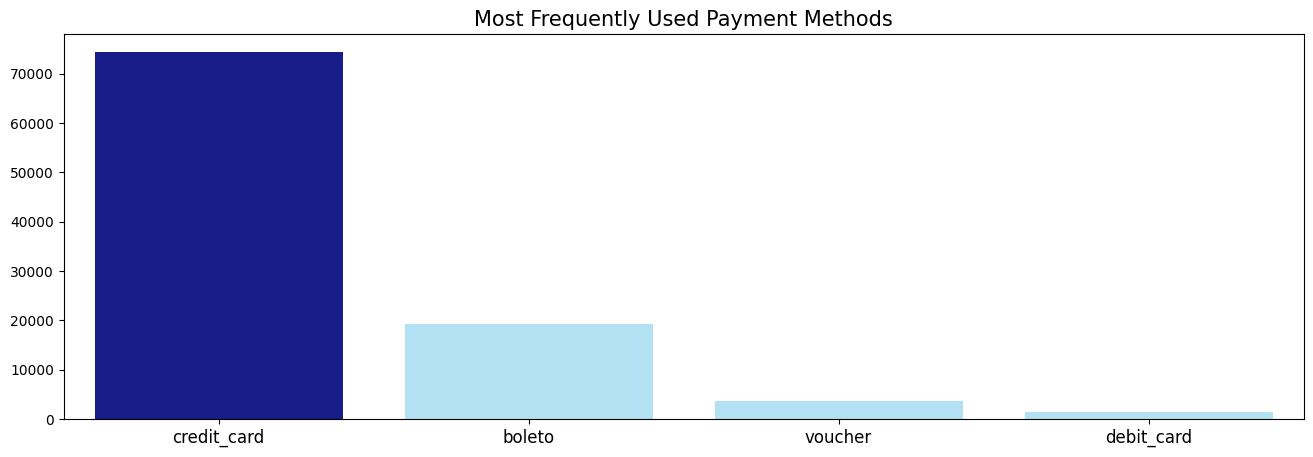

In [ ]:
by_payment_type_df = all_df.groupby(by='payment_type').order_id.nunique().sort_values(ascending=False).reset_index()
by_payment_type_df.rename(columns={
    'order_id': 'order_count'
}, inplace=True)

plt.figure(figsize=(16, 5))
colors = ['#050C9C', '#A7E6FF', '#A7E6FF', '#A7E6FF', '#A7E6FF']
sns.barplot(
    x='payment_type',
    y='order_count',
    data=by_payment_type_df,
    palette=colors
)
plt.title('Most Frequently Used Payment Methods', loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 2:

In [ ]:
sum_orders_by_seller_df = all_df.groupby(by='seller_id').price.sum().reset_index()
sum_orders_by_seller_df.sort_values(by='price', ascending=True)

,seller_id,price
1414,77128dec4bec4878c37ab7d6169d6f26,6.50
363,1fa2d3def6adfa70e58c276bb64fe5bb,6.90
1319,702835e4b785b67a084280efca355756,7.60
2007,ad14615bdd492b01b0d97922e87cb87f,8.25
846,4965a7002cca77301c82d3f91b82e1a9,8.49
...,...,...
1480,7c67e1448b00f6e969d365cea6b010ab,196840.49
2903,fa1c13f2614d7b5c4749cbc52fecda94,200859.33
858,4a3ca9315b744ce9f8e9374361493884,209618.87
834,4869f7a5dfa277a7dca6462dcf3b52b2,235382.53


<ipython-input-74-e41da8224d09>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-74-e41da8224d09>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


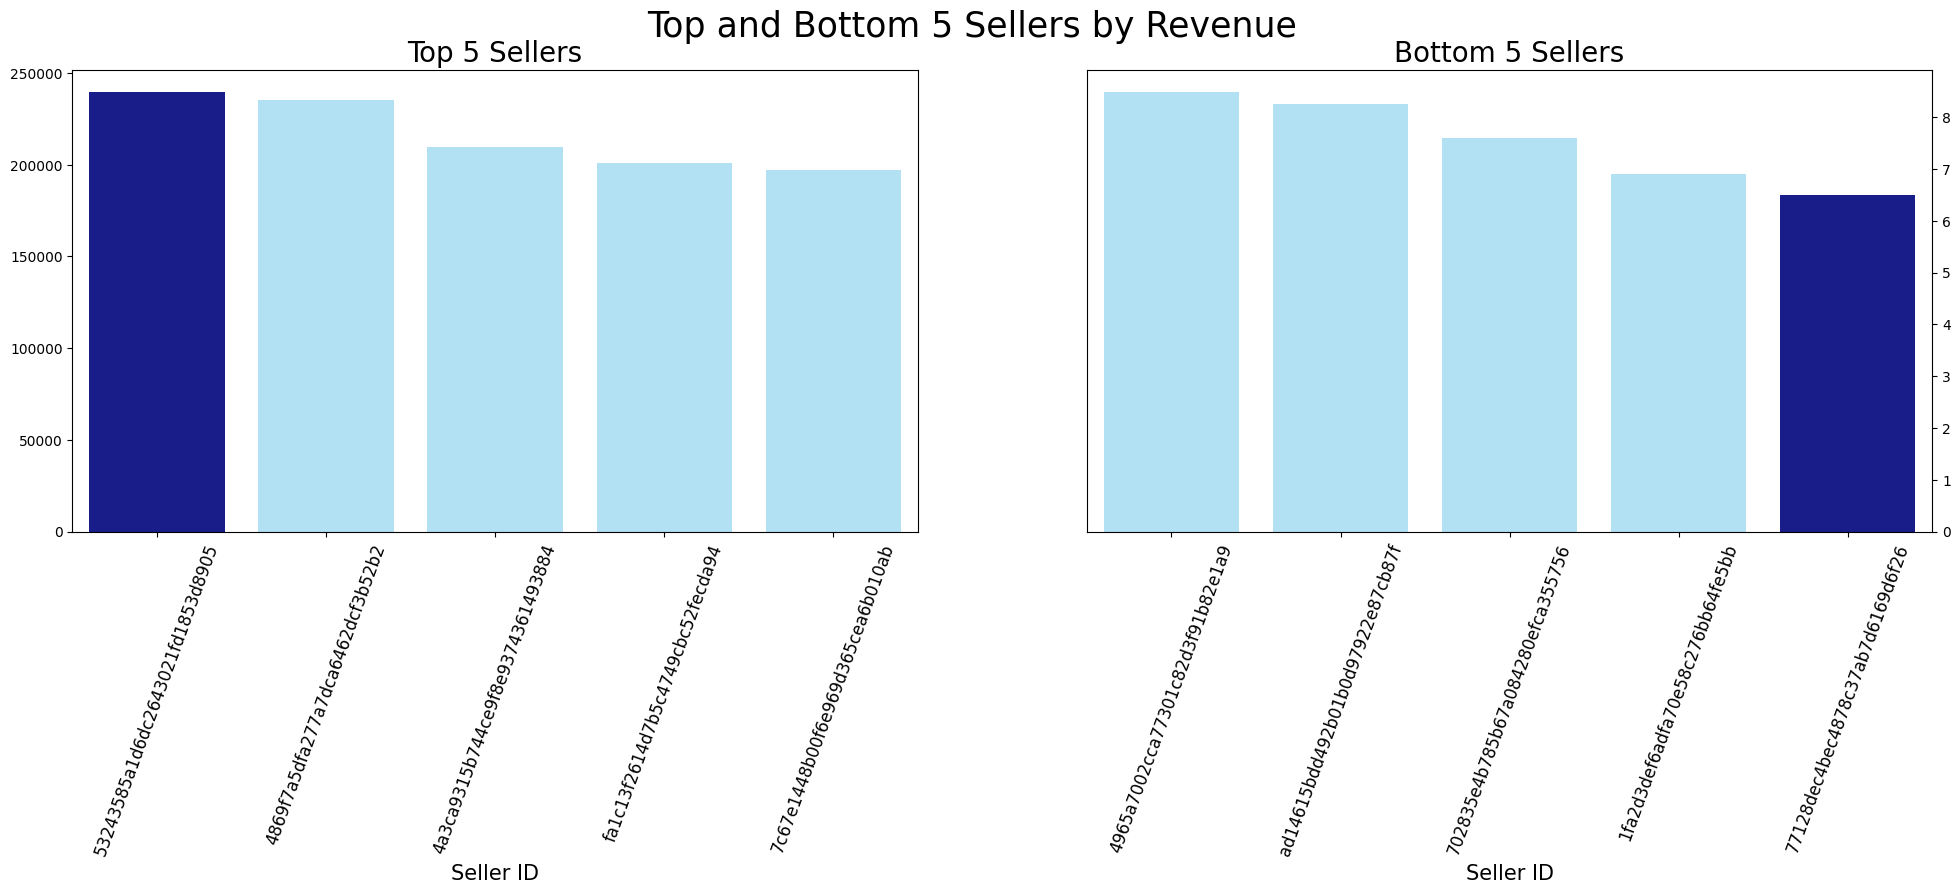

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
colors = ['#050C9C', '#A7E6FF', '#A7E6FF', '#A7E6FF', '#A7E6FF']

sns.barplot(
    x='seller_id',
    y='price',
    data=sum_orders_by_seller_df.sort_values(by='price' ,ascending=False).head(5),
    palette=colors,
    ax=ax[0]
)

ax[0].set_ylabel(None)
ax[0].set_xlabel('Seller ID', fontsize=15)
ax[0].set_title('Top 5 Sellers', loc='center', fontsize=20)
ax[0].tick_params(axis='x', labelsize=12, labelrotation=70)

sns.barplot(
    x='seller_id',
    y='price',
    data=sum_orders_by_seller_df.sort_values(by='price', ascending=True).head(5),
    palette=colors,
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel('Seller ID', fontsize=15)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title('Bottom 5 Sellers', loc='center', fontsize=20)
ax[1].tick_params(axis='x', labelsize=12, labelrotation=70)

plt.suptitle('Top and Bottom 5 Sellers by Revenue', fontsize=25)
plt.show()

### Pertanyaan 3:

In [ ]:
years = all_df['order_purchase_timestamp'].dt.year.unique()
print(years)

[2017 2018 2016]


In [ ]:
all_2016_df = all_df[all_df['order_purchase_timestamp'].dt.year == 2016]
all_2016_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,packaging_time,delivery_time,delivery_delay,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value
915,02190241f7190a1f3c7e0df95a749c6a,1,e00d2c49504aeaf7acdc9ff7cf8a6107,46dc3b2cc0980fb8ec44634e21d2718e,2016-10-12 04:44:23,249.99,10.74,55c9044401ffab0c717f24405e2e042f,delivered,2016-10-07 10:52:22,...,13.0,20.0,-33.0,22240,rio de janeiro,RJ,1.0,boleto,1.0,521.46
916,02190241f7190a1f3c7e0df95a749c6a,2,e00d2c49504aeaf7acdc9ff7cf8a6107,46dc3b2cc0980fb8ec44634e21d2718e,2016-10-12 04:44:23,249.99,10.74,55c9044401ffab0c717f24405e2e042f,delivered,2016-10-07 10:52:22,...,13.0,20.0,-33.0,22240,rio de janeiro,RJ,1.0,boleto,1.0,521.46
918,021d08e4057e5b6414c8d2f69f4f72a0,1,a819714dd23a6ac18b1be2b13686017b,ffff564a4f9085cd26170f4732393726,2016-10-17 19:01:41,51.50,14.53,7470a1ddb5f78a811fbef15b2556781b,delivered,2016-10-07 17:37:49,...,18.0,22.0,-50.0,13070,campinas,SP,1.0,credit_card,1.0,66.03
1325,03128233e78ed8ade6738f2043f4cf8d,1,3cacd5299c846cb08ae1e445fd78392b,c7dcd301ecfe5ab7f778ac172cf74be7,2016-10-21 16:25:24,57.90,14.61,da1c9a7e7fa9de1d48ecd6d6e027313e,delivered,2016-10-04 19:01:13,...,24.0,27.0,-27.0,30120,belo horizonte,MG,1.0,credit_card,1.0,72.51
1763,03ffce741877a000ca0fb3520673d4c4,1,660422061e06da17ca6101e9d6b7aae8,76d5af76d0271110f9af36c92573f765,2016-10-10 16:02:37,649.00,169.12,e937151346d1bec664f5b80cd798bdd2,delivered,2016-10-05 15:17:57,...,9.0,20.0,-44.0,3194,sao paulo,SP,1.0,credit_card,10.0,818.12


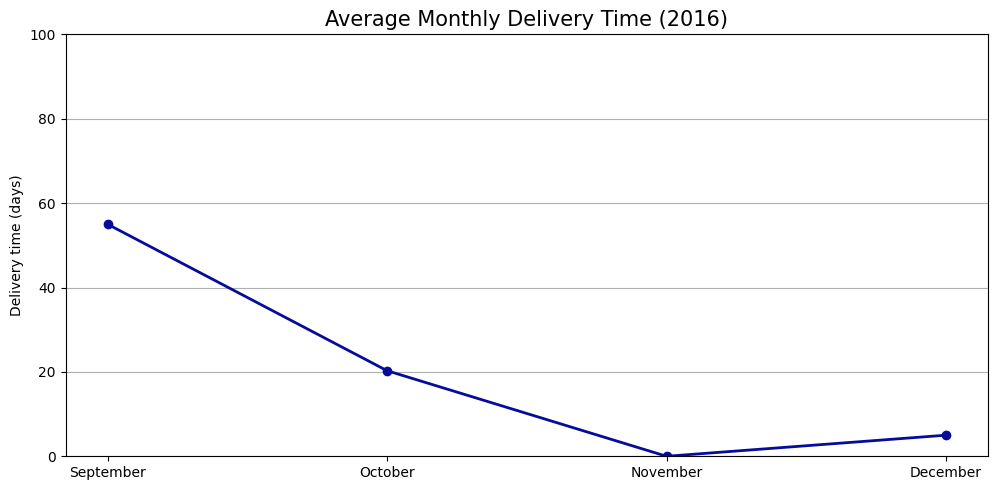

In [ ]:
monthly_delivery_time_2016_df = all_2016_df.resample(rule='M', on='order_purchase_timestamp').agg({
    'order_id': 'nunique',
    'delivery_time': 'mean'
})
monthly_delivery_time_2016_df.index = monthly_delivery_time_2016_df.index.strftime('%B')
monthly_delivery_time_2016_df = monthly_delivery_time_2016_df.reset_index()
monthly_delivery_time_2016_df.fillna(0, inplace=True)
monthly_delivery_time_2016_df.head()

plt.figure(figsize=(10, 5))
plt.plot(
    monthly_delivery_time_2016_df['order_purchase_timestamp'],
    monthly_delivery_time_2016_df['delivery_time'],
    marker='o',
    linewidth=2,
    color='#050C9C'
)
plt.title('Average Monthly Delivery Time (2016)', loc='center', fontsize=15)
plt.ylabel('Delivery time (days)')
plt.grid(axis='y')
plt.tight_layout()
plt.ylim(0, 100)
plt.show()

In [ ]:
all_2017_df = all_df[all_df['order_purchase_timestamp'].dt.year == 2017]
all_2017_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,packaging_time,delivery_time,delivery_delay,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,6.0,8.0,-8.0,27277,volta redonda,SP,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,8.0,16.0,-2.0,3471,sao paulo,SP,1.0,credit_card,3.0,259.83
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.9,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,12.0,25.0,-15.0,87900,loanda,PR,1.0,credit_card,3.0,218.04
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.9,12.69,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,...,0.0,7.0,-14.0,14091,ribeirao preto,SP,1.0,boleto,1.0,34.59
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.9,11.85,32e2e6ab09e778d99bf2e0ecd4898718,delivered,2017-12-10 11:53:48,...,2.0,8.0,-16.0,1026,sao paulo,SP,1.0,credit_card,1.0,31.75


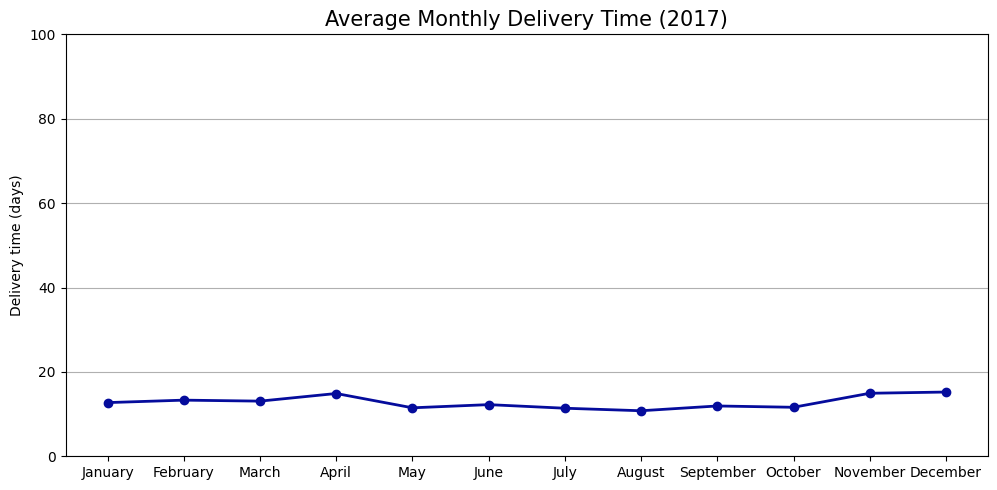

In [ ]:
monthly_delivery_time_2017_df = all_2017_df.resample(rule='M', on='order_purchase_timestamp').agg({
    'order_id': 'nunique',
    'delivery_time': 'mean'
})
monthly_delivery_time_2017_df.index = monthly_delivery_time_2017_df.index.strftime('%B')
monthly_delivery_time_2017_df = monthly_delivery_time_2017_df.reset_index()
monthly_delivery_time_2017_df.fillna(0, inplace=True)
monthly_delivery_time_2017_df.head()

plt.figure(figsize=(10, 5))
plt.plot(
    monthly_delivery_time_2017_df['order_purchase_timestamp'],
    monthly_delivery_time_2017_df['delivery_time'],
    marker='o',
    linewidth=2,
    color='#050C9C'
)
plt.title('Average Monthly Delivery Time (2017)', loc='center', fontsize=15)
plt.ylabel('Delivery time (days)')
plt.grid(axis='y')
plt.tight_layout()
plt.ylim(0, 100)
plt.show()

In [ ]:
all_2018_df = all_df[all_df['order_purchase_timestamp'].dt.year == 2018]
all_2018_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,packaging_time,delivery_time,delivery_delay,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,2.0,8.0,-13.0,37564,borda da mata,MG,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,2.0,6.0,-5.0,14403,franca,SP,1.0,credit_card,2.0,25.78
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,9ed5e522dd9dd85b4af4a077526d8117,delivered,2018-07-04 12:08:27,...,-0.0,5.0,-15.0,19010,presidente prudente,SP,1.0,credit_card,10.0,880.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65,16150771dfd4776261284213b89c304e,delivered,2018-03-19 18:40:33,...,7.0,10.0,1.0,3702,sao paulo,SP,1.0,credit_card,3.0,157.60
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40,351d3cb2cee3c7fd0af6616c82df21d3,delivered,2018-07-02 13:59:39,...,1.0,2.0,-18.0,2274,sao paulo,SP,1.0,credit_card,1.0,65.39


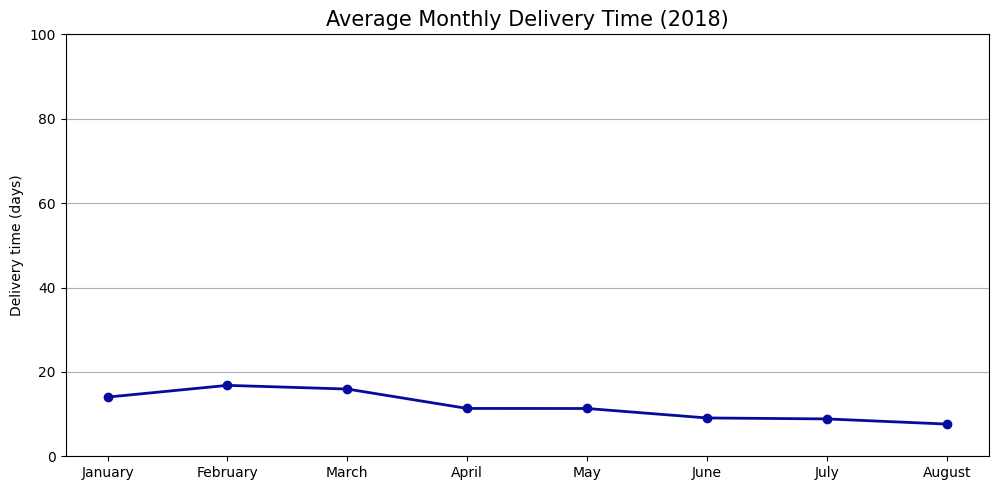

In [ ]:
monthly_delivery_time_2018_df = all_2018_df.resample(rule='M', on='order_purchase_timestamp').agg({
    'order_id': 'nunique',
    'delivery_time': 'mean'
})
monthly_delivery_time_2018_df.index = monthly_delivery_time_2018_df.index.strftime('%B')
monthly_delivery_time_2018_df = monthly_delivery_time_2018_df.reset_index()
monthly_delivery_time_2018_df.fillna(0, inplace=True)
monthly_delivery_time_2018_df.head()

plt.figure(figsize=(10, 5))
plt.plot(
    monthly_delivery_time_2018_df['order_purchase_timestamp'],
    monthly_delivery_time_2018_df['delivery_time'],
    marker='o',
    linewidth=2,
    color='#050C9C'
)
plt.title('Average Monthly Delivery Time (2018)', loc='center', fontsize=15)
plt.ylabel('Delivery time (days)')
plt.grid(axis='y')
plt.tight_layout()
plt.ylim(0, 100)
plt.show()

### Pertanyaan 4:

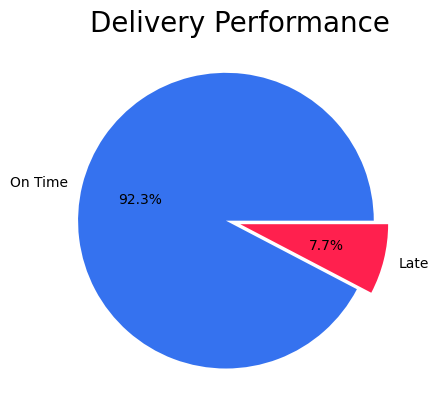

In [ ]:
late_delivery_precentage = (all_df['delivery_delay'] > 0).mean() * 100
on_time_delivery_precentage = 100 - late_delivery_precentage

plt.pie(
    x=[on_time_delivery_precentage, late_delivery_precentage],
    labels=["On Time", "Late"],
    colors=['#3572EF', '#FF204E'],
    autopct='%1.1f%%',
    explode=[0.1, 0]
)
plt.title('Delivery Performance', loc='center', fontsize=20)
plt.show()

**Insight:**
- Berdasarkan visualisasi, credit card menjadi tipe pembayaran yang paling sering digunakan yaitu sebanyak 74297 dengan total pembayaran sebesar R$ 15189217.05 (Real Brazil), lalu disusul dengan perbedaan yang cukup jauh oleh boleto, voucher, dan debit card
- Berdasarkan visualisasi, seller dengan id "53243585a1d6dc2643021fd1853d8905" merupakan seller dengan pendapatan tertinggi dan seller dengan id "77128dec4bec4878c37ab7d6169d6f26" merupakan seller dengan pendapatan terendah
- Berdasarkan visualisasi, pada tahun 2016 rata-rata waktu pengiriman pada bulan September waktu pengiriman lebih dari atau sama dengan 50 hari, namun pada bulan Oktober turun hingga rata-rata 20 hari, tetapi pada bulan November tidak ada data pengiriman yang membuat nilainya menjadi 0, dan pada bulan Desember waktu pengiriman rata-rata 5 hari
- Berdasarkan visualisasi, pada tahun 2017, rata-rata waktu pengiriman per bulan selama setahun kurang dari 20 hari
- Berdasarkan visualisasi, pada tahun 2018, pada bulan Februari rata-rata waktu pengiriman hampir menyentuh angka 20 hari, namun pada bulan-bulan selanjutnya rata-rata waktu pengiriman turun sampai rata-rata kurang dari atau sama dengan 10 hari
- Berdasarkan visualisasi, presentase keterlambatan pengiriman adalah 7.7% dan waktu ketepatan atau kurang dari waktu estimasi yaitu 92,3 %

## Analisis Lanjutan (Opsional)

In [ ]:
rfm_df = all_df.groupby(by='seller_id', as_index=False).agg({
   'order_approved_at': 'max',
   'order_id': 'nunique',
   'price': 'sum'
})
rfm_df.columns = ['seller_id', 'max_order_timestamp', 'frequency', 'monetary']
rfm_df['max_order_timestamp'] = rfm_df['max_order_timestamp'].dt.date
recent_date = orders_df['order_purchase_timestamp'].dt.date.max()
rfm_df['recency'] = rfm_df['max_order_timestamp'].apply(lambda x: (recent_date - x).days)

rfm_df.drop('max_order_timestamp', axis=1, inplace=True)
rfm_df.head()

,seller_id,frequency,monetary,recency
0,0015a82c2db000af6aaaf3ae2ecb0532,3,2685.00,315
1,001cca7ae9ae17fb1caed9dfb1094831,195,24655.93,48
2,002100f778ceb8431b7a1020ff7ab48f,50,1265.30,139
3,003554e2dce176b5555353e4f3555ac8,1,120.00,257
4,004c9cd9d87a3c30c522c48c4fc07416,156,24404.86,116


<ipython-input-84-d0764588e985>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-84-d0764588e985>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-84-d0764588e985>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


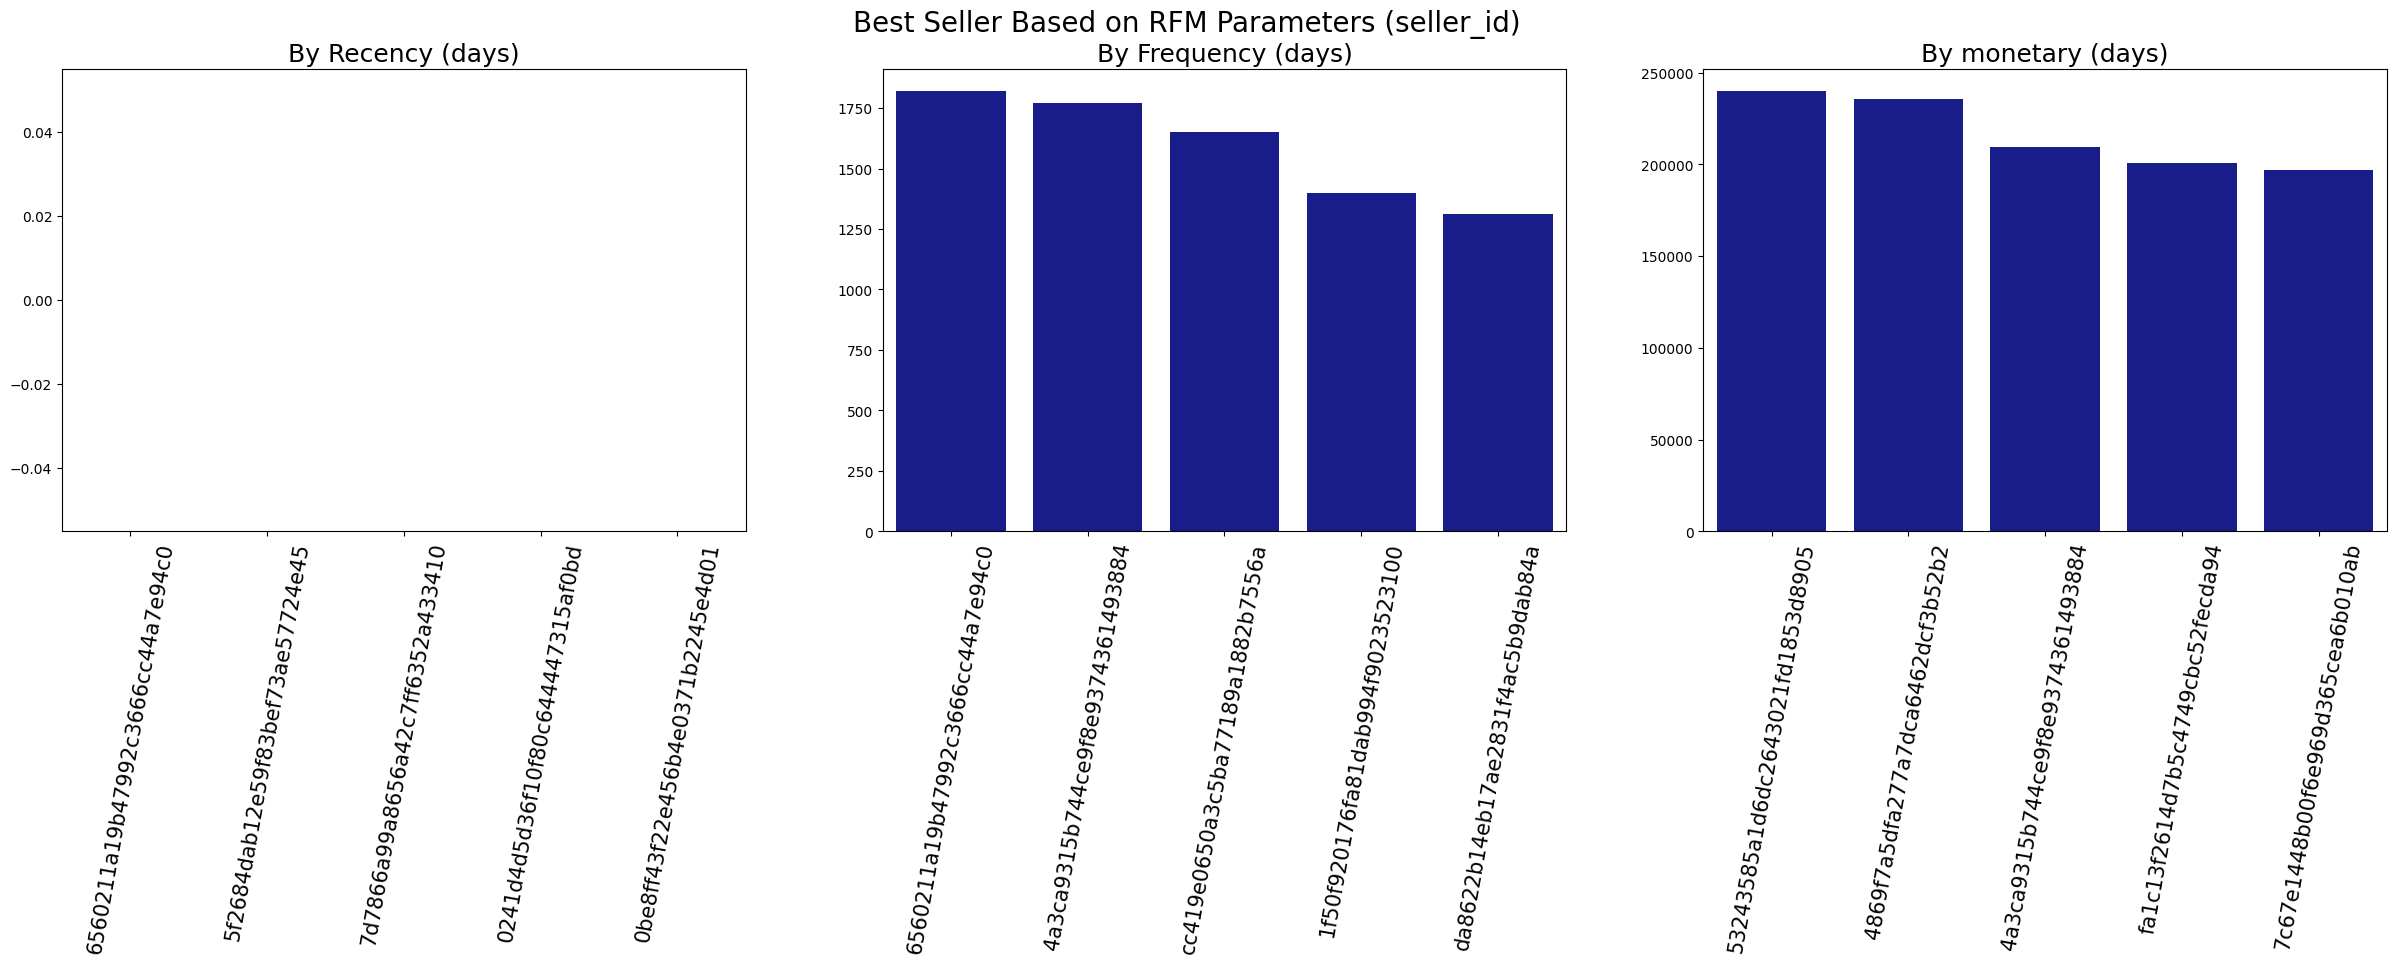

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ['#050C9C', '#050C9C', '#050C9C', '#050C9C', '#050C9C']

sns.barplot(
    y='recency',
    x='seller_id',
    data=rfm_df.sort_values(by='recency', ascending=True).head(5),
    palette=colors,
    ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title('By Recency (days)', loc='center', fontsize=18)
ax[0].tick_params(axis='x', labelsize=15, labelrotation=80)

sns.barplot(
    y='frequency',
    x='seller_id',
    data=rfm_df.sort_values(by='frequency', ascending=False).head(5),
    palette=colors,
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title('By Frequency (days)', loc='center', fontsize=18)
ax[1].tick_params(axis='x', labelsize=15, labelrotation=80)

sns.barplot(
    y='monetary',
    x='seller_id',
    data=rfm_df.sort_values(by='monetary', ascending=False).head(5),
    palette=colors,
    ax=ax[2]
)
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title('By monetary (days)', loc='center', fontsize=18)
ax[2].tick_params(axis='x', labelsize=15, labelrotation=80)

plt.suptitle("Best Seller Based on RFM Parameters (seller_id)", fontsize=20)
plt.show()

## Conclusion

- Conclution pertanyaan 1: Credit card merupakan metode pembayaran yang paling banyak digunakan
- Conclution pertanyaan 2: seller dengan id "53243585a1d6dc2643021fd1853d8905" merupakan seller dengan pendapatan tertinggi dan seller dengan id "77128dec4bec4878c37ab7d6169d6f26" merupakan seller dengan pendapatan terendah
- Conclution pertanyaan 3: Pada tahun 2016, rata-rata waktu pengiriman tertinggi hampir menyentuh 60 hari namun mengalami penurunan pada bulan-bulan selanjutnya, lalu pada tahun 2017 dan 2018 rata-rata waktu pengirimin perbulan selama setahun kurang dari 20 hari
- Conclution pertanyaan 4: Presentase keterlambatan pengiriman barang sebesar 7.7%

In [ ]:
all_df.to_csv("main_data.csv", index=False)